In [87]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import log_loss, mean_squared_error

In [88]:
from sklearn.metrics import classification_report

# DATA pre-prosessing part

## Load data and labels

#### load training data and lables

In [89]:
train_data = pd.read_csv('orange_small_train.data', sep = '\t')
appetency = pd.read_csv('orange_small_train_appetency_train.labels',header=None).astype('float')
churn = pd.read_csv('orange_small_train_churn_train.labels', header=None).astype('float')
upselling = pd.read_csv('orange_small_train_upselling_train.labels',header=None).astype('float')

In [90]:
appetency.columns = ['appetency']
churn.columns = ['churn']
upselling.columns = ['upselling']

In [91]:
df = pd.DataFrame(data = {'-1':[-1]})

In [92]:
#appetency[appetency.appetency ==1]

#### load test data

In [93]:
test_data = pd.read_csv('orange_small_test.data', sep = '\t',header=None)
test_appetency = pd.read_csv('orange_small_train_appetency_test.labels',header=None).astype('float')
test_appetency.shape[0]
test_data.shape[0]


25000

## Data clean

#### Take a look at the head 10 rows

In [94]:
train_data.head(10)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
5,NaN,NaN,NaN,NaN,NaN,658.0,7.0,NaN,NaN,NaN,...,zCkv,QqVuch3,LM8l689qOp,NaN,NaN,Qcbd,02N6s8f,Zy3gnGM,am7c,NaN
6,NaN,NaN,NaN,NaN,NaN,1680.0,7.0,NaN,NaN,NaN,...,oslk,XlgxB9z,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN
7,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,NaN,...,oslk,R2LdzOv,NaN,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1176.0,7.0,NaN,NaN,NaN,...,zCkv,K2SqEo9,jySVZNlOJy,NaN,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c,NaN
9,NaN,NaN,NaN,NaN,NaN,1141.0,7.0,NaN,NaN,NaN,...,oslk,EPqQcw6,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,NaN,NaN


#### Check if there are too many missing data, draw the loss data picture here TO BE DONE

In [95]:
column_names = train_data.columns

In [96]:
column_names

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10',
       ...
       'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226', 'Var227',
       'Var228', 'Var229', 'Var230'],
      dtype='object', length=230)

In [97]:
####create an 25000 dimentions with 0 array = [0]*250000

In [98]:
###arrayportion_series = pd.Series(0,index = train_data.columns)

In [99]:
###train_data.index train_data.columns

#### Drop the columns whose loss rate > 20%

In [100]:
drop_list = [x for x in column_names if len([ y for y in train_data.loc[:,x].isna() if y == True]) > train_data.shape[0]*0.2]

In [101]:
#drop_list

In [102]:
##train_data.shape??? To judge if data is data frame or series

In [103]:
#####
for x in column_names:
    test_arr = []
    for y in train_data.loc[:,x].isna() :
        if y == False :
            test_arr.append(y)
    #print("lable ="+x)
   # print(len(test_arr))
   # print("\n")

In [104]:
test_data.columns = train_data.columns

In [105]:
train_data = train_data.drop(drop_list,axis=1)
test_data = test_data.drop(drop_list,axis=1)
#test_data = test_data.drop(drop_list,axis=1)

#### Fill the NA of the data type is  int or float data with mean

In [106]:
#train_data.mean(axis=0)

#### You can see from above that only numberic columns are printed, so just use below function to fill the na numberic values.
#### Tree models do not need

In [107]:
train_data.fillna(train_data.mean())
test_data.fillna(test_data.mean())

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,574.00000,7.000000,4.000000,128.000000,160.000000,0.000000,0.000000,200.000000,0.000000,1.180362e+07,...,1_T1,UYBR,NaN,Z1nSz1e,Al6ZaUT,DQ3PflC,NaN,uWr3,02N6s8f,xwM2aC7IdeMC0
1,2079.00000,7.000000,284.000000,236.000000,295.000000,20.000000,120.000000,133.120000,0.000000,4.260000e+02,...,FI5J,cJvF,OFWH,Hofvwg4,oslk,mKmKSaP,LM8l689qOp,453m,RAYp,F2FyR07IdsN7I
2,1085.00000,0.000000,0.000000,232.000000,290.000000,2.000000,168.000000,166.560000,0.000000,2.203800e+04,...,vXSF,cJvF,qxDb,3Jmmfvd,oslk,JD1lw9w,LM8l689qOp,kwS7,RAYp,F2FyR07IdsN7I
3,1379.00000,7.000000,300.000000,104.000000,130.000000,8.000000,24.000000,117.040000,0.000000,4.886400e+04,...,5oh2,cJvF,FzaX,6VLNqhB,oslk,6YSocsg,LM8l689qOp,rgKb,RAYp,F2FyR07IdsN7I
4,1141.00000,7.000000,232.000000,152.000000,190.000000,2.000000,56.000000,229.920000,0.000000,4.755288e+06,...,Xije,UYBR,FzaX,KtBOw16,oslk,NKvz4Af,LM8l689qOp,WqMG,RAYp,F2FyR07IdsN7I
5,1322.42486,6.838302,1240.090238,234.436161,290.272278,4.449207,96.893002,224.272986,0.685812,2.591329e+06,...,bHR7,UYBR,FzaX,hN8QNDb,d0EEeJi,2wddidG,LM8l689qOp,Qu4f,02N6s8f,F2FyR07IdsN7I
6,1322.42486,6.838302,1240.090238,234.436161,290.272278,4.449207,96.893002,224.272986,0.685812,2.591329e+06,...,9L64,UYBR,FzaX,K9BD5lR,oslk,JeNz_Hx,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
7,1322.42486,6.838302,1240.090238,234.436161,290.272278,4.449207,96.893002,224.272986,0.685812,2.591329e+06,...,rdgs,UYBR,OFWH,WFgfrxM,oslk,HpgObSS,LM8l689qOp,Qcbd,RAYp,F2FyR07IdsN7I
8,1322.42486,6.838302,1240.090238,234.436161,290.272278,4.449207,96.893002,224.272986,0.685812,2.591329e+06,...,FMag,UYBR,NaN,gwj3_5u,oslk,APgu8Zv,NaN,FSa2,RAYp,F2FyR07IdsN7I
9,868.00000,7.000000,16.000000,668.000000,835.000000,24.000000,536.000000,166.560000,0.000000,4.737000e+04,...,31LB,UYBR,FzaX,pHXYlW4,oslk,wYv2Oqu,LM8l689qOp,WqMG,RAYp,F2FyR07IdsN7I


In [108]:
train_data.dtypes.describe()

count          66
unique          3
top       float64
freq           37
dtype: object

#### Convert the string columns to category type. Need an analysis figure to illustrate why category can be chosen.

In [109]:
object_columns = train_data.select_dtypes(['object']).columns 

In [110]:
train_data[object_columns] = train_data[object_columns].apply(lambda col: col.astype('category'))
test_data[object_columns] = test_data[object_columns].apply(lambda col: col.astype('category'))
#test_data[object_columns] = test_data[object_columns].apply(lambda col: col.astype('category'))

In [111]:
#train_data.dtypes

In [112]:
train_data['Var223'].cat.categories

Index(['LM8l689qOp', 'M_8D', 'bCPvVye', 'jySVZNlOJy'], dtype='object')

In [113]:
len(train_data.select_dtypes(['category']).columns)

28

#### Convert the category to codes. Not needed for tree models

In [114]:
train_data[object_columns] = train_data[object_columns].apply(lambda x: x.cat.codes)
test_data[object_columns] = test_data[object_columns].apply(lambda x: x.cat.codes)
#test_data[object_columns] = test_data[object_columns].apply(lambda x: x.cat.codes)

#### Convert the category type to float. Not needed for tree models

In [115]:
#train_data[object_columns] = train_data[object_columns].apply(lambda x: x.astype('int'))
#test_data[object_columns] = test_data[object_columns].apply(lambda x: x.astype('int'))

#### Rebalance

Text(0.5, 1.0, 'Easy as 1, 2, 3')

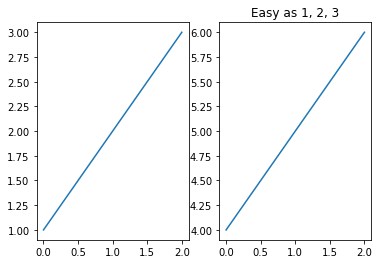

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)                # the first figure
plt.subplot(121)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(122)             # the second subplot in the first figure
plt.plot([4, 5, 6])
  


plt.title('Easy as 1, 2, 3') # subplot 211 title

In [117]:
labels = pd.concat([appetency, churn, upselling],axis=1)
labels.columns = ['appetency', 'churn', 'upselling']

In [118]:
#ax0 = appetency.hist(bins=4)
#print(ax0)
#ax0[0][0].set_ylabel("Appetency")

In [119]:
appetency = (appetency + 1)/2
churn = (churn + 1)/2
upselling = (upselling + 1)/2
test_appetency = (test_appetency + 1)/2

In [120]:
data = pd.concat([train_data,appetency],axis=1)

In [121]:
##appetency.columns = ['col1']
#churn.columns = ['col1']
#upselling.columns = ['col1']

In [122]:
#ax0 = appetency.hist(bins=4)
len(appetency[appetency.appetency == 0])
len(appetency[appetency.appetency == 1])

438

<BarContainer object of 2 artists>

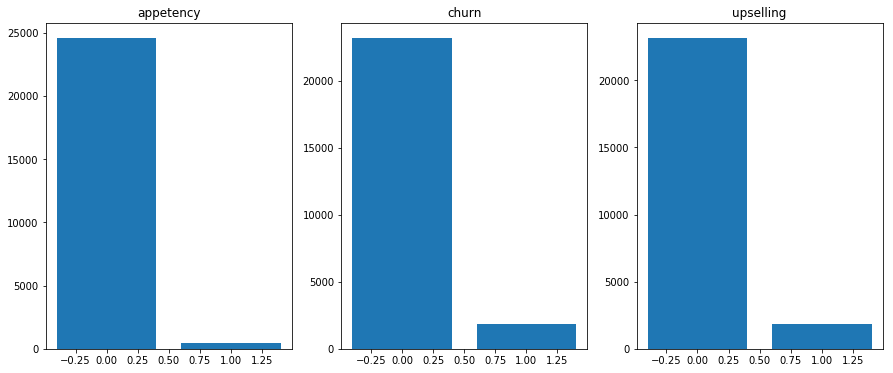

In [123]:
fig = plt.figure(1,figsize=(15,6))
plt.subplot(131)
plt.title("appetency")
plt.bar([0,1],[len(appetency[appetency.appetency <= 0]),len(appetency[appetency.appetency > 0])])
plt.subplot(132)
plt.title("churn")
plt.bar([0,1],[len(appetency[churn.churn <= 0]),len(appetency[churn.churn > 0])])
plt.subplot(133)
plt.title("upselling")
plt.bar([0,1],[len(appetency[upselling.upselling <= 0]),len(appetency[upselling.upselling > 0])])
#ax1= churn.hist(bins=4)
#ax1.ylabel('{}'.format('Churn'))               

#plt.subplot(132)
#ax2= upselling.hist(bins=4)
#ax2.ylabel('{}'.format('Upselling'))

#plt.subplot(133,label="app")
#ax0 = appetency.hist(bins=4)
#ax0[0][0].set_ylabel('{}'.format('Appetency'))

#plt.legend()

In [124]:
from sklearn import preprocessing
from sklearn.utils import resample

In [125]:
RANDOM_SEED = 42
#datatrain = data.drop(['churn','upselling'],axis=1)
df_maj = data[data.appetency==0]
df_min = data[data.appetency==1]
df_maj.shape,df_min.shape 
# Upsample minority class
df_min_upsampled = resample(df_min, 
                                replace=True,     # sample with replacement
                                 n_samples=df_maj.shape[0],    # to match majority class
                                 random_state=RANDOM_SEED) # reproducible results

df_upsampled = pd.concat([df_maj, df_min_upsampled])
df_X = df_upsampled.drop(['appetency'],axis=1)
df_y = df_upsampled['appetency']


X_train, X_test, y_train, y_test = train_test_split(df_X,df_y ,test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train.values
X_test = X_test.values
y_train = y_train
y_test = y_test

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)


In [126]:
df_maj

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,appetency
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,1,11,62,4,2158,3,22,2,8,0.0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,-1,11,5,4,85,0,14,2,8,0.0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,0,11,929,0,1153,3,10,0,24,0.0
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,0,11,1047,4,576,0,7,2,8,0.0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,0,11,1265,4,46,0,7,2,8,0.0
5,658.0,7.0,3156.0,224.0,280.0,2.0,72.0,200.00,5.0,0.0,...,0,11,1013,6,1355,0,9,0,19,0.0
6,1680.0,7.0,2952.0,308.0,385.0,4.0,128.0,176.56,0.0,13158.0,...,0,11,933,4,1706,0,7,2,2,0.0
7,77.0,0.0,0.0,32.0,40.0,2.0,16.0,230.56,0.0,3776496.0,...,0,-1,1528,4,1368,-1,7,2,8,0.0
8,1176.0,7.0,2912.0,200.0,250.0,2.0,64.0,300.32,0.0,6014460.0,...,-1,11,1406,6,960,3,8,1,21,0.0
9,1141.0,7.0,164.0,208.0,260.0,2.0,72.0,166.56,5.0,5317974.0,...,0,11,2203,4,681,0,7,2,2,0.0


#### Fill the NA with the most frequent item TO BE DONE for non-tree classifier.
#### Tree models do not need.
#### Do one hot encoding. TO BE DONE 

# LGB part

In [127]:
#### lgb load training and testing data

In [128]:
#lgb_train_data = lgb.Dataset(data=train_data, label=appetency)
#lgb_test_data = lgb.Dataset(data=test_data,label=test_appetency,reference=lgb_train_data)

In [129]:
####lgb parameters

In [130]:
#param = {'num_leaves': 31, 'objective': 'binary','metric':'auc'}

In [131]:
####Training lgb model

In [132]:
#for ty in train_data.dtypes:
    #print(ty)

In [133]:
#num_round = 10
#bst = lgb.train(param, lgb_train_data, num_round, valid_sets=[lgb_test_data])#,categorical_feature=object_columns, valid_sets=[lgb_test_data]

In [134]:
#pred = bst.predict(test_data)

In [135]:
#appetency.columns

In [136]:
#appetency[appetency.col1 == 1].shape[0]/appetency.shape[0]


In [137]:
s = pd.Series([1, 3, 5,  6, 8])

In [138]:
s.shape

(5,)

In [139]:
#appetency

In [140]:
#X_train, X_test, y_train, y_test = train_test_split(train_data, appetency, test_size=0.1, random_state=42)

In [141]:
#y_test.head()


In [142]:
 gbm = lgb.LGBMClassifier(n_estimators=50, silent=True)
 gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=False)
 #result = gbm.predict_proba(X_test)
 #print(result)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [143]:
#len(result)

In [144]:
result2 = gbm.predict(X_test)
result3 = gbm.predict(test_data)

In [145]:
#print(result2)

In [146]:
#len([x for x in result2 if x == -1])

In [147]:
#y_train.describe()
y_test.describe()
y_train.describe()

count    39299.000000
mean         0.498842
std          0.500005
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: appetency, dtype: float64

In [148]:
from sklearn.metrics import classification_report

In [149]:
y_test

3365     0.0
22212    0.0
2164     1.0
719      0.0
22090    1.0
9414     0.0
16268    0.0
5927     0.0
14648    0.0
16316    0.0
6884     1.0
14417    1.0
21367    1.0
9045     1.0
150      0.0
5034     1.0
1528     0.0
14216    0.0
19716    1.0
24741    0.0
6322     0.0
20560    1.0
1945     0.0
18721    1.0
8734     1.0
20187    1.0
12937    1.0
22855    1.0
12780    1.0
16604    1.0
        ... 
13685    0.0
15942    1.0
10324    1.0
3707     0.0
9908     0.0
7066     1.0
13754    0.0
4923     1.0
8659     0.0
9570     0.0
3305     0.0
9078     0.0
24664    0.0
7892     1.0
5779     1.0
11411    1.0
13476    1.0
20502    1.0
15637    0.0
6329     1.0
16031    0.0
9378     0.0
15607    1.0
6246     1.0
11934    0.0
10813    1.0
1159     0.0
4395     1.0
19139    0.0
8619     1.0
Name: appetency, Length: 9825, dtype: float64

In [150]:
print(classification_report(y_test,result2))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      4867
         1.0       0.89      0.96      0.93      4958

   micro avg       0.92      0.92      0.92      9825
   macro avg       0.92      0.92      0.92      9825
weighted avg       0.92      0.92      0.92      9825



In [151]:
print(classification_report(test_appetency,result3))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     24548
         1.0       0.00      0.00      0.00       452

   micro avg       0.98      0.98      0.98     25000
   macro avg       0.49      0.50      0.50     25000
weighted avg       0.96      0.98      0.97     25000



C:\Users\mocui\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [152]:
test_appetency.columns

Int64Index([0], dtype='int64')

In [154]:
test_appetency[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       1.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
24970    0.0
24971    1.0
24972    1.0
24973    0.0
24974    0.0
24975    0.0
24976    0.0
24977    0.0
24978    0.0
24979    0.0
24980    0.0
24981    0.0
24982    0.0
24983    0.0
24984    0.0
24985    0.0
24986    0.0
24987    0.0
24988    0.0
24989    0.0
24990    0.0
24991    0.0
24992    0.0
24993    0.0
24994    0.0
24995    1.0
24996    1.0
24997    0.0
24998    0.0
24999    0.0
Name: 0, Length: 25000, dtype: float64

In [ ]:
#len([x for x in y_train if x != -1.0])

In [ ]:
 #ret = log_loss(y_test, gbm.predict_proba(X_test))
#print(ret)
